In [6]:
import matplotlib.pyplot as plt
from Bio.SeqUtils.ProtParam import ProteinAnalysis

def plot_amino_acid_composition(sequence):
    """
    Gera um gráfico de barras mostrando a composição de aminoácidos de uma sequência proteica.
    
    Parâmetros:
    sequence (str): Sequência de aminoácidos da proteína.
    """
    # Análise da sequência proteica
    analysis = ProteinAnalysis(sequence)
    composition = analysis.get_amino_acids_percent()

    # Ordenar aminoácidos
    amino_acids = sorted(composition.keys())
    percentages = [composition[aa] * 100 for aa in amino_acids]  # Converter para porcentagem

    # Definir cores para cada barra
    colors = plt.cm.tab20(range(len(amino_acids)))  # Usar um colormap com 20 cores distintas

    # Criar gráfico de barras
    plt.figure(figsize=(10, 6))
    bars = plt.bar(amino_acids, percentages, color=colors)
    plt.xlabel('Aminoácidos')
    plt.ylabel('Porcentagem (%)')
    plt.title('Composição de Aminoácidos')

    # Adicionar rótulos de porcentagem acima de cada barra
    for bar, percentage in zip(bars, percentages):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{percentage:.2f}%', ha='center', va='bottom')

    plt.show()


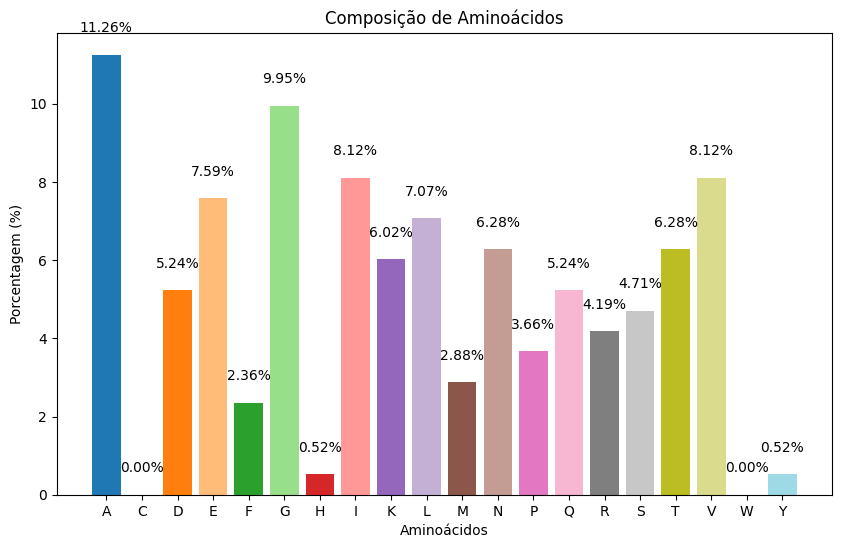

In [7]:
sequence='MLEFETNIDGLASIKVIGVGGGGNNAVNRMIENEVQGVEYIAVNTDAQALNLSKAEVKMQIGAKLTRGLGAGANPEVGKKAAEESKEQIEEALKGADMVFVTAGMGGGTGTGAAPVIAQIAKDLGALTVGVVTRPFTFEGRKRQLQAAGGISAMKEAVDTLIVIPNDRILEIVDKNTPMLEAFREADNVLRQGVQGISDLIATPGLINLDFADVKTIMSNKGSALMGIGIATGENRAAEAAKKAISSPLLEAAIDGAQGVLMNITGGTNLSLYEVQEAADIVASASDQDVNMIFGSVINENLKDEIVVTVIATGFIEQEKDVTKPQRPSLNQSIKTHNQSVPKREPKREEPQQQNTVSRHTSQPADDTLDIPTFLRNRNKRG'
plot_amino_acid_composition(sequence)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from Bio.SeqUtils.ProtParam import ProteinAnalysis

def plot_protein_properties(sequence):
    """
    Gera um gráfico de radar mostrando propriedades de uma proteína com base na sua sequência de aminoácidos.
    
    Parâmetros:
    sequence (str): Sequência de aminoácidos da proteína.
    """
    # Analisar a sequência da proteína
    analysis = ProteinAnalysis(sequence)
    
    # Calcular propriedades
    properties = {
        'Peso Molecular (kDa)': analysis.molecular_weight() / 1000,
        'Ponto Isoelétrico': analysis.isoelectric_point(),
        'Instabilidade': analysis.instability_index(),
        'Hidrofobicidade': analysis.gravy(),
        'Aromaticidade (%)': analysis.aromaticity() * 100
    }
    
    # Nomes das propriedades
    labels = list(properties.keys())
    values = list(properties.values())
    
    # Adicionar o primeiro valor ao final para fechar o gráfico
    values += values[:1]
    
    # Ângulos para cada eixo
    angles = np.linspace(0, 2 * np.pi, len(labels) + 1, endpoint=True)
    
    # Criar o gráfico de radar
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    # Plotar a linha e preencher a área
    ax.plot(angles, values, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.4)
    
    # Configurar os rótulos dos eixos
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    
    # Adicionar valores ao gráfico
    for angle, value, label in zip(angles, values, labels):
        ax.text(angle, value, f'{value:.2f}', horizontalalignment='center', size=10, color='black', weight='semibold')

    # Título do gráfico
    plt.title('Propriedades da Proteína')
    
    # Mostrar o gráfico
    plt.show()

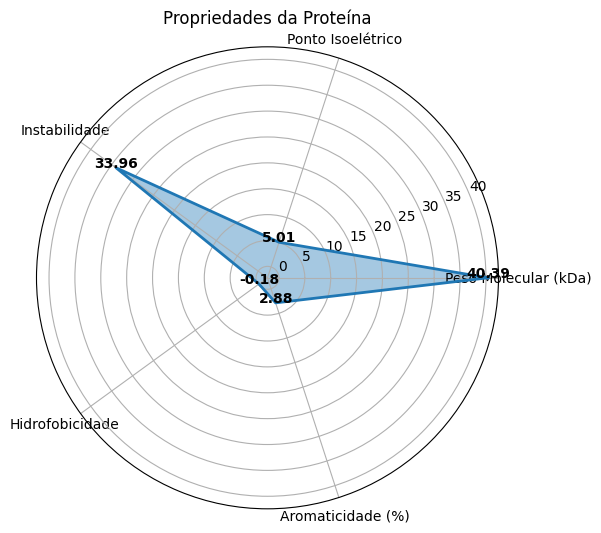

In [15]:
plot_protein_properties(sequence)